# Problème 5 : Polynômes et interpolation

Dans ce problème, nous allons d'abord créer une classe pour représenter et manipuler les polynômes, puis nous utiliserons cette classe pour programmer des méthodes d'interpolation polynomiale.

## A. Classe pour les polynômes

### A.1. Représentation des polynômes et premières méthodes

La classe pour les polynômes sera appelée `Poly`. Dans cette classe, un polynôme sera représenté par un attribut `coeff` contenant la liste de ses coefficients, du coefficient du terme constant jusqu'au coefficient du terme de plus haut degré. 

Par exemple, le polynôme $X^3-2X^2+3$ sera représenté par la liste `[3, 0, -2, 1]` et le polynôme $X^4 + 3X -5$ sera représenté par la liste `[-5, 3, 0, 0, 1]`.

Par convention, le polynôme nul sera représenté par la liste vide `[]`.

---

**Question A.1.** 💻
- Dans un premier temps, créer la classe `Poly` munie :
  * de la méthode de construction `__init__` (qui prendra en paramètre une liste de coefficients qu'elle affectera à l'attribut `coeff` après l'avoir débarrassée des `0` finaux superflus) ;
  * des méthodes d'affichage `__repr__` et `__str__`.

Voilà quelques exemples que cette première version de la classe `Poly` doit pouvoir reproduire.

~~~py
>>> Poly([3, 0, -2, 1])
Poly([3, 0, -2, 1])

>>> Poly([3, 0, -2, 1, 0, 0])
Poly([3, 0, -2, 1])

>>> Poly([0])
Poly([])

>>> print(Poly([3, 0, -2, 1]))
1*x**3 - 2*x**2 + 3

>>> print(Poly([0, -1, -3]))
- 3*x**2 - 1*x

>>> print(Poly([]))
0
~~~

In [20]:
import copy


class Poly:
    def __init__(self, coeff: list):
        self.coeff = copy.copy(coeff)
        n = len(coeff)
        for i in range(n-1, 0, -1):
            if self.coeff[i] == 0:
                del(self.coeff[i])
            else:
                break

    def __repr__(self):
        return str(self.coeff)

    def __str__(self):
            degree = len(self.coeff) - 1
            equation = ""
            for i in range(-1, -len(self.coeff) - 1, -1):
                if degree == 0:
                    equation += " + " + str(self.coeff[i])
                    degree -= 1
                    continue
                if self.coeff[i] != 0:
                    if (self.coeff[i] >= 0) and (i != -1):
                        equation += " + "
                    if i < degree:
                        if self.coeff[i] != 1 and self.coeff[i] != 0:
                            equation += f"{self.coeff[i]}X**{degree} "
                        elif self.coeff[i] != 0 or (degree == 1 and self.coeff[i] != 0):
                            equation += f"X**{degree} "
                    else:
                        equation += str(self.coeff[i])            
                degree -= 1
            return equation

    def degre(self):
        return len(self.coeff) - 1

    def derive(self):
        degree = len(self.coeff) - 1
        listc = []
        for i in range(len(self.coeff), 0, -1):
            if i != 0:
                if self.coeff[i-1] != 0:
                    if degree != 1 or degree != 0:
                        listc.append(self.coeff[i-1] * degree)
                else:
                    listc.append(0)
            degree -= 1
        return Poly(self.coeff)
    
    def __add__(self, other):
        addition = []
        while len(other.coeff) < len(self.coeff):
            other.coeff.append(0)
        while len(other.coeff) > len(self.coeff):
            self.coeff.append(0)
        for i in range(max(len(self.coeff), len(other.coeff))):
            addition.append(other.coeff[i] + self.coeff[i])
        n = len(addition)
        for i in range(n-1, 0, -1):
            if addition[i] == 0:
                del(addition[i])

        return addition
    
    def __neg__(self):
        for i in range(len(self.coeff)):
            self.coeff[i] = - self.coeff[i]
        return self.coeff

    def __sub__(self, other):
        if len(self.coeff) < len(other.coeff):
            self.coeff.extend([0] * (len(other.coeff) - len(self.coeff)))
        elif len(self.coeff) > len(other.coeff):
            other.coeff.extend([0] * (len(self.coeff) - len(other.coeff)))
        
        result_coeff = [a - b for a, b in zip(self.coeff, other.coeff)]
        return result_coeff

    def __mul__(self, other):
        degree_self = len(self.coeff) - 1
        degree_other = len(other.coeff) - 1
        degree_result = degree_self + degree_other

        result_coeff = [0] * (degree_result + 1)

        for i in range(len(self.coeff)):
            for j in range(len(other.coeff)):
                result_coeff[i + j] += self.coeff[i] * other.coeff[j]

        return (result_coeff)
    
    def eval(self, x):
        v = 0
        for k in range(len(self.coeff)):
            v += self.coeff[k] * x**k
        return v


---
**Question A.2.** 💻 Compléter la classe `Poly` en y ajoutant les méthodes suivantes :
- `degre`, qui renvoie le degré du polynôme (avec la convention que le degré du polynôme nul vaut -1) ;
- `derive`, qui renvoie le polynôme dérivé du polynôme.

Voilà quelques illustrations du comportement attendu.
~~~py
>>> Poly([1, 0, -1]).degre()
2

>>> Poly([]).degre()
-1

>>> Poly([3, 0, -2, 1]).derive()
Poly([0, -4, 3])
~~~

---
### A.2. Evaluation d'un polynôme
On cherche à programmer une méthode `eval` qui évalue un polynôme en un point donné. Par exemple, le polynôme $X^3-2X^2+3$ évalué en $X=2$ donne $2^3-2^2+3=3$.

Une première implémentation, basée sur un algorithme naïf, est donnée ci-dessous.

```py
def eval(self, x):
    v = 0
    for k in range(len(self.coeff)):
         v += self.coeff[k] * x**k
    return v
```

Voilà quelques exemples d'utilisation de cette méthode `eval`.

```py
>>> Poly([3, 0, -2, 1]).eval(2)
3

>>> Poly([3, 0, -2, 1]).eval(-1)
0
```

**Question A.3.** ✏️ Déterminer la complexité (en nombre d'additions et de multiplications, en ne gardant que le terme dominant asymptotiquement) de la méthode `eval` donnée ci-dessus pour évaluer un polynôme de degré $n$ en un point donné. On considérera que le nombre de multiplications effectuées par l'opération `x**k` est de l'ordre de $\log_2(k)$.

*Indication :* Pour simplifier l'expression obtenue, on pourra utiliser l'équivalent suivant quand $n\rightarrow +\infty$ :  $\log_2(n!)\sim n \log_2(n)$.

*Remarque :* La complexité en $\log_2(k)$ pour l'opération `x**k` est la complexité obtenue lorsqu'on utilise l'algorithme d'exponentiation rapide.

<font color=green><b>Réponse.</b>
La complexité de la méthode eval() pour évaluer un polynôme de degré $n$ de $n \log_2(n)$.
</font>

---

Il existe un algorithme plus efficace pour l'évaluation d'un polynôme : l'**algorithme de Horner**. 
Pour simplifier, présentons cet algorithme sur un polynôme de degré $3$.
$$
P(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3
$$
On peut réécrire cette expression sous la forme :
$$
P(x) = a_0 + x(a_1  + x(a_2 + xa_3))
$$
Ainsi, pour calculer $P(x)$ pour un $x$ donné :
- on part de la valeur $a_3$, 
- puis on multiplie cette valeur par $x$ et on ajoute $a_2$, 
- puis on multiplie cette valeur par $x$ et on ajoute $a_1$,
- puis on multiplie cette valeur par $x$ et on ajoute $a_0$.

**Question A.4.** 💻 Ajouter une méthode `eval` dans la classe `Poly` qui implémente l'algorithme de Horner.

**Question A.5.** ✏️ Déterminer la complexité (en nombre d'additions et de multiplications, en ne gardant que le terme dominant asymptotiquement) de l'algorithme de Horner pour évaluer un polynôme de degré $n$ en un point donné.

<font color=green><b>Réponse.</b>
La complexité de l'algorithme d'Honer est $\mathcal{O}(deg(n))$.
</font>

---
### A.3. Somme et produit de polynômes

**Question A.6.** ✏️ Soit $P$ un polynôme de degré $n$ et $Q$ un polynôme de degré $m$. Que peut-on dire du degré de $P+Q$ ? de $PQ$ ?

<font color=green><b>Réponse.</b>
Le degré du Polynome P + Q = max(P, Q) <br>
Le degré du Polynome PQ = deg(P) + deg(Q)
</font>

**Question A.7.** 💻 Compléter la classe `Poly` en y ajoutant les méthodes spéciales `__add__`, `__neg__`, `__sub__` et `__mul__`. Voilà quelques illustrations du comportement attendu.

~~~py
>>> P = Poly([2, 1, -1])
>>> Q = Poly([0, 2, 1])
>>> P + Q
Poly([2, 3])

>>> P - Q
Poly([2, -1, -2])

>>> Poly([0, 1]) * P
Poly([0, 2, 1, -1])

>>> P * Q
Poly([0, 4, 4, -1, -1])
~~~

*Indication :* Pour la multiplication d'un polynôme `P` de degré `n` et d'un polynôme `Q` de degré `m`, commencer par créer une liste de taille `n*m` remplie de `0`. Puis considérer le produit de chaque terme de `P` avec chaque terme de `Q` (à l'aide d'une double boucle) et modifier la liste en conséquence.

**Question A.8.** ✏️ Quelle est la complexité (en nombre d'additions) de la méthode `__add__` pour calculer la somme d'un polynôme de degré $n$ et d'un polynôme de degré $m$ ?

<font color=green><b>Réponse.</b>
la complexité en nombre d'additions est proportionnelle au degré maximal entre les deux polynômes, soit $\mathcal{O}(\max(n, m))$.</font>

**Question A.9.** ✏️ Quelle est la complexité (en nombre d'additions et de multiplications) de la méthode `__mul__` pour calculer le produit d'un polynôme de degré $n$ et d'un polynôme de degré $m$ ?

<font color=green><b>Réponse.</b>
La complexité de $n$ et $m$ est en $\mathcal{O}(n \cdot m)$ en termes de multiplications et en $\mathcal{O}(\max(n, m))$ en termes d'additions.
</font>

**Question A.10.** 💻 Insérer des tests (*doctests*) dans les chaînes de documentation (*docstrings*) des différentes méthode de la classe `Poly`. Tester la classe `Poly` avec la commande `testmod` du module `doctest`.

In [21]:
from doctest import testmod

import copy


class Poly:
    def __init__(self, coeff: list):
        self.coeff = copy.copy(coeff)
        n = len(coeff)
        for i in range(n-1, 0, -1):
            if self.coeff[i] == 0:
                del(self.coeff[i])
            else:
                break

    def __repr__(self):
        return str(self.coeff)

    def __str__(self):
            degree = len(self.coeff) - 1
            equation = ""
            for i in range(-1, -len(self.coeff) - 1, -1):
                if degree == 0:
                    equation += " + " + str(self.coeff[i])
                    degree -= 1
                    continue
                if self.coeff[i] != 0:
                    if (self.coeff[i] >= 0) and (i != -1):
                        equation += " + "
                    if i < degree:
                        if self.coeff[i] != 1 and self.coeff[i] != 0:
                            equation += f"{self.coeff[i]}X**{degree} "
                        elif self.coeff[i] != 0 or (degree == 1 and self.coeff[i] != 0):
                            equation += f"X**{degree} "
                    else:
                        equation += str(self.coeff[i])            
                degree -= 1
            return equation

    def degre(self):
        return len(self.coeff) - 1

    def derive(self):
        degree = len(self.coeff) - 1
        listc = []
        for i in range(len(self.coeff), 0, -1):
            if i != 0:
                if self.coeff[i-1] != 0:
                    if degree != 1 or degree != 0:
                        listc.append(self.coeff[i-1] * degree)
                else:
                    listc.append(0)
            degree -= 1
        return Poly(self.coeff)
    
    def __add__(self, other):
        addition = []
        while len(other.coeff) < len(self.coeff):
            other.coeff.append(0)
        while len(other.coeff) > len(self.coeff):
            self.coeff.append(0)
        for i in range(max(len(self.coeff), len(other.coeff))):
            addition.append(other.coeff[i] + self.coeff[i])
        n = len(addition)
        for i in range(n-1, 0, -1):
            if addition[i] == 0:
                del(addition[i])

        return addition
    
    def __neg__(self):
        for i in range(len(self.coeff)):
            self.coeff[i] = - self.coeff[i]
        return self.coeff

    def __sub__(self, other):
        if len(self.coeff) < len(other.coeff):
            self.coeff.extend([0] * (len(other.coeff) - len(self.coeff)))
        elif len(self.coeff) > len(other.coeff):
            other.coeff.extend([0] * (len(self.coeff) - len(other.coeff)))
        
        result_coeff = [a - b for a, b in zip(self.coeff, other.coeff)]
        return result_coeff

    def __mul__(self, other):
        degree_self = len(self.coeff) - 1
        degree_other = len(other.coeff) - 1
        degree_result = degree_self + degree_other

        result_coeff = [0] * (degree_result + 1)

        for i in range(len(self.coeff)):
            for j in range(len(other.coeff)):
                result_coeff[i + j] += self.coeff[i] * other.coeff[j]

        return Poly(result_coeff)
    
    def eval(self, x):
        v = 0
        for k in range(len(self.coeff)):
            v += self.coeff[k] * x**k
        return v


'''
>>> P = Poly([2, 1, -1])
>>> Q = Poly([0, 2, 1])
>>> P + Q
[2, 3]

>>> P - Q
[2, -1, -2]

>>> Poly([0, 1]) * P
[0, 2, 1, -1]

>>> P * Q
[0, 4, 4, -1, -1]
'''

if __name__ == "__main__":
    testmod()


---
### A.4. Tracé d'une courbe polynomiale

**Question A.11.** 💻 Ecrire une fonction `drawpoly` qui prend en paramètres un polynôme `P`, deux nombres flottants `x0` et `x1`, un entier `N`, et qui trace la représentation graphique de ce polynôme sur l'intervalle $[x_0,x_1]$ avec la commande `plot` du module `matplotlib.pyplot` en utilisant `N` points intermédiaires. On définira une valeur par défaut pour `N` égale à `100`.

In [28]:
import copy


class Poly:
    def __init__(self, coeff: list):
        self.coeff = copy.copy(coeff)
        n = len(coeff)
        for i in range(n-1, 0, -1):
            if self.coeff[i] == 0:
                del(self.coeff[i])
            else:
                break

    def __repr__(self):
        return str(self.coeff)

    def __str__(self):
            degree = len(self.coeff) - 1
            equation = ""
            for i in range(-1, -len(self.coeff) - 1, -1):
                if degree == 0:
                    equation += " + " + str(self.coeff[i])
                    degree -= 1
                    continue
                if self.coeff[i] != 0:
                    if (self.coeff[i] >= 0) and (i != -1):
                        equation += " + "
                    if i < degree:
                        if self.coeff[i] != 1 and self.coeff[i] != 0:
                            equation += f"{self.coeff[i]}X**{degree} "
                        elif self.coeff[i] != 0 or (degree == 1 and self.coeff[i] != 0):
                            equation += f"X**{degree} "
                    else:
                        equation += str(self.coeff[i])            
                degree -= 1
            return equation

    def degre(self):
        return len(self.coeff) - 1

    def derive(self):
        degree = len(self.coeff) - 1
        listc = []
        for i in range(len(self.coeff), 0, -1):
            if i != 0:
                if self.coeff[i-1] != 0:
                    if degree != 1 or degree != 0:
                        listc.append(self.coeff[i-1] * degree)
                else:
                    listc.append(0)
            degree -= 1
        return Poly(self.coeff)
    
    def __add__(self, other):
        addition = []
        while len(other.coeff) < len(self.coeff):
            other.coeff.append(0)
        while len(other.coeff) > len(self.coeff):
            self.coeff.append(0)
        for i in range(max(len(self.coeff), len(other.coeff))):
            addition.append(other.coeff[i] + self.coeff[i])
        n = len(addition)
        for i in range(n-1, 0, -1):
            if addition[i] == 0:
                del(addition[i])

        return addition
    
    def __neg__(self):
        for i in range(len(self.coeff)):
            self.coeff[i] = - self.coeff[i]
        return self.coeff

    def __sub__(self, other):
        if len(self.coeff) < len(other.coeff):
            self.coeff.extend([0] * (len(other.coeff) - len(self.coeff)))
        elif len(self.coeff) > len(other.coeff):
            other.coeff.extend([0] * (len(self.coeff) - len(other.coeff)))
        
        result_coeff = [a - b for a, b in zip(self.coeff, other.coeff)]
        return result_coeff

    def __mul__(self, other):
        degree_self = len(self.coeff) - 1
        degree_other = len(other.coeff) - 1
        degree_result = degree_self + degree_other

        result_coeff = [0] * (degree_result + 1)

        for i in range(len(self.coeff)):
            for j in range(len(other.coeff)):
                result_coeff[i + j] += self.coeff[i] * other.coeff[j]

        return Poly(result_coeff)
    

    def eval(self, x):
        v = 0
        for k in range(len(self.coeff)):
            v += self.coeff[k] * x**k
        return v


import matplotlib.pyplot as plt
import numpy as np


def drawpoly(P, x0, x1, N=100):
    x = np.linspace(x0, x1, N)
    y = P.eval(x)
    lst_y = []
    for xi in x:
        yi = P.eval(xi)
        lst_y.append(yi)


    plt.plot(x, y)
    plt.grid(True)
    plt.show()


**Question A.12.** 💻 En utilisant cette fonction `drawpoly`, tracer la représentation graphique du polynôme $ -2X^3 + X +1$ sur l'intervalle $[-1,1]$.

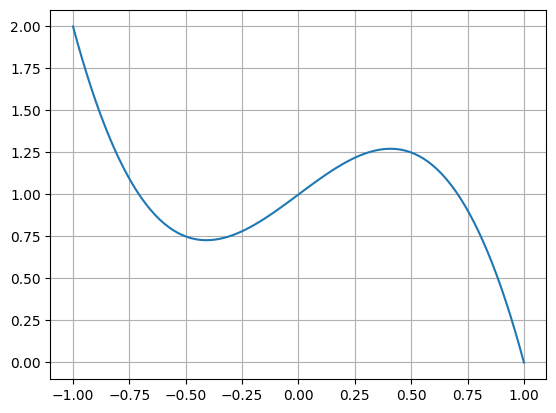

In [27]:
P = Poly([1, 1, 0, -2])
x0 = -1
x1 = 1

drawpoly(P, x0, x1)

---
### A.5. Une application : une suite de polynômes

On considère la suite de polynômes $(P_n)_{n\in\mathbb{N}}$ définis par la relation de récurrence
$$ P_{n+1}(X) = 2 X P_{n}(X) - P_{n-1}(X), $$
avec $P_0 = 1$ et $P_1 = X$.

**Question A.13.** 💻 Ecrire un programme qui calcule les dix premiers polynômes de la suite et trace leurs courbes représentatives sur l'intervalle $[-1,1]$.

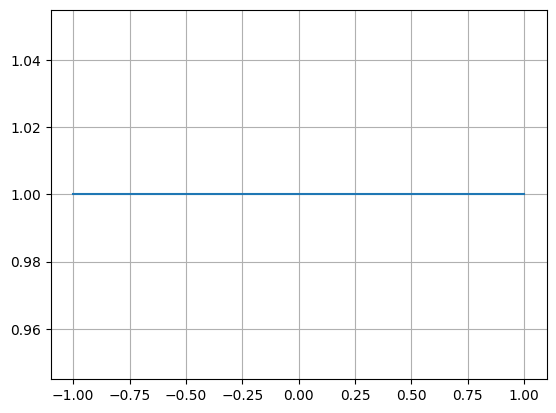

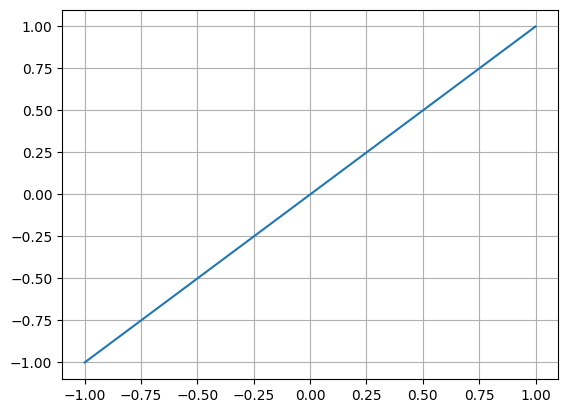

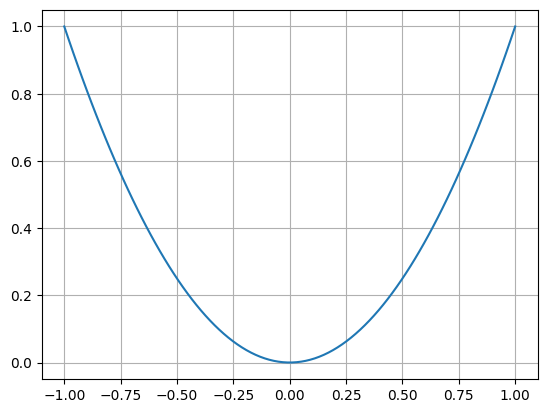

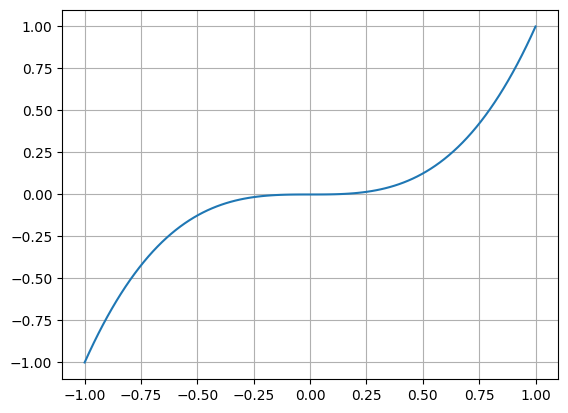

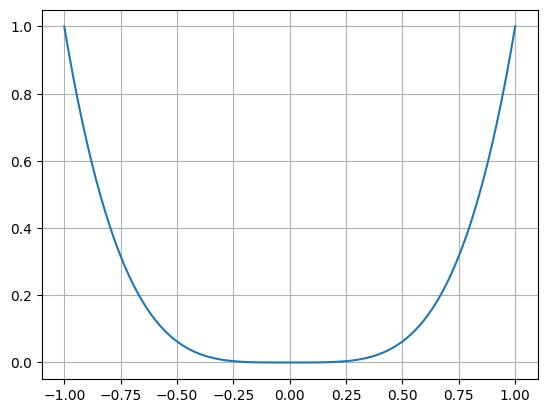

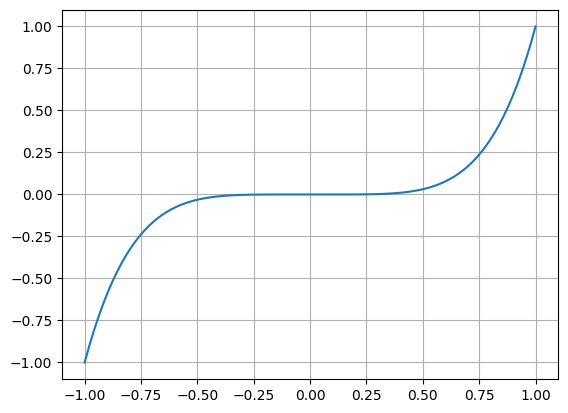

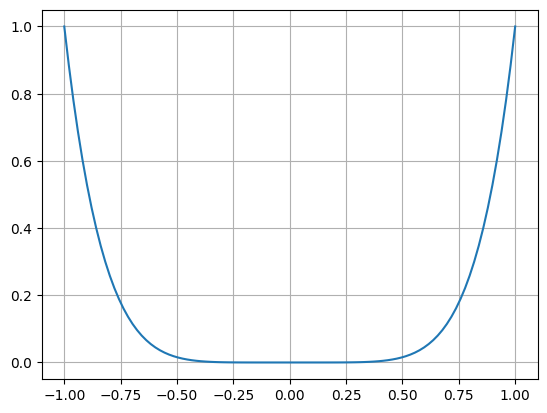

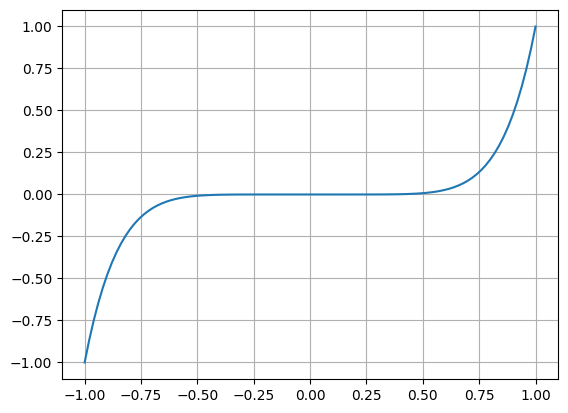

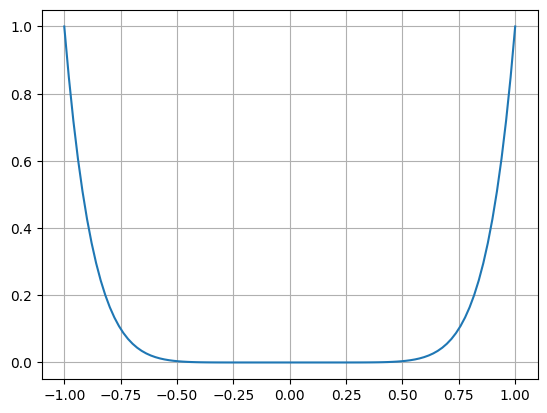

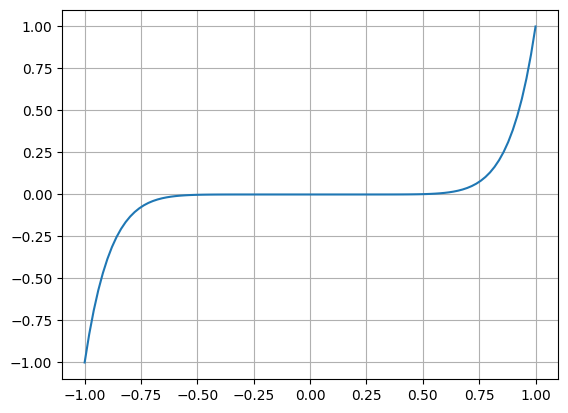

In [29]:
def programme():

    P = Poly([1])
    for i in range(10):
        drawpoly(P, -1, 1)
        P = Poly([0, 1]) * P

    plt.show()


programme()

**Question A.14.** ✏️ Au vu de ces courbes, quelle conjecture peut-on faire sur le nombre et la localisation des racines réelles du polynôme $P_n$ pour $n$ donné ?

<font color=green><b>Réponse.</b>
On peut remarquer qu'au moment de l'itteration de i, les courbes suivent bien les propriétés de degré i. (Symetrie horizontal pour les degré pair
</font>

---

## B. Interpolation

Soit $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$ un ensemble de points tels que $x_0 < x_1 < \ldots < x_n$.
Nous cherchons à construire une courbe **régulière** qui passe par ces points. Autrement dit, nous cherche à construire une fonction $f: [x_0,x_n] \rightarrow \mathbb{R}$ régulière telle que

$$f(x_0)=y_0,\quad f(x_1)=y_1, \quad \ldots,\quad f(x_n)=y_n.$$

Puisqu'il s'agit de définir le chemin entre des points, on parle de courbes (et de fonctions) d'**interpolation**. Les courbes d'interpolation sont utilisées dans de nombreuses applications, notamment en **infographie**.

Il existe différentes techniques d'interpolation. Nous nous intéressons ici :

* à l'**interpolation de Lagrange**,

* aux **interpolations de Hermite** et plus particulièrement à l'**interpolation de Catmull-Rom**.

### B.1. Polynôme d'interpolation de Lagrange

Soit $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$ un ensemble de points tels que $x_0 < x_1 < \ldots < x_n$. On appelle **polynôme d'interpolation de Lagrange** le polynôme $P$ de degré $\leq n$ tel que $P(x_0) = y_0, P(x_1)=y_1,\ldots, P(x_n)=y_n$.

### B.1.1 Existence et unicité du polynôme d'interpolation

Soit $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$ un ensemble de points tels que $x_0 < x_1 < \ldots < x_n$. Soit $\varphi :\mathbb{R}_n[X] \rightarrow \mathbb{R}^{n+1}$ l'application définie par

$$
\varphi(P)=\Big(P(x_0),P(x_{1}), \ldots, P(x_n)\Big).
$$

On admet que l'application $\varphi$ est une application linéaire.

**Question B.1.** ✏️ Soit  $P \in \operatorname{Ker} \varphi$. En raisonnant sur le nombre de racines de $P$, montrer que $P$ est le polynôme nul.

<font color=green><b>Réponse.</b>
On suppose m>1 et on prend   un $P(x_0) = 0$ et $P(x_0) = P(x_1) = P(x_n) $ donc que le polynomes P est forcement nul
</font>

**Question B.2.** ✏️ En déduire que $\varphi$ est injective, puis, par un argument de dimension, que $\varphi$ est bijective.

<font color=green><b>Réponse.</b>
Comme le polynome est nul et la dimension de depart et d'arriver sont de la meme taille et que la fonction est lineaire alors on a une fonction injectif et comme elles ont la meme dimension alors alors elle est aussi bijectif (vu en tp de MI)
La fonction est bijective donc il y a un unique polynome d'interpolation
</font>

---
### B.1.2. Calcul des coefficients du polynôme d'interpolation

Une façon de calculer les coefficients du polynôme d'interpolation de Lagrange consiste à résoudre un système linéaire.

Soit $P$ le polynôme d'interpolation de Lagrange passant par les points $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$.

Il s'agit d'un polynôme de degré $n$ donc il peut s'écrire :

$$
P(X) = a_0 +a_1 X + \ldots +a_n X^n.
$$

Par ailleurs, il vérifie :

$$
\left\{
\begin{array}{l}
P(x_0)=y_0 \\
P(x_1)=y_1\\
\vdots\\
P(x_n)=y_n
\end{array}
\right.
$$


**Question B.4.** ✏️ En déduire un système linéaire $n\times n$ sur les coefficients $a_0, a_1,\ldots, a_n$ du polynôme d'interpolation de Lagrange $P$.

<font color=green><b>Réponse.</b>
*-- Compléter le système. --*

\begin{align*}
1 &\cdot a_0 + x_0 \cdot a_1 + x_0^2 \cdot a_2 + \ldots + x_0^n \cdot a_n &= y_0 \\
1 &\cdot a_0 + x_1 \cdot a_1 + x_1^2 \cdot a_2 + \ldots + x_1^n \cdot a_n &= y_1 \\
&\vdots \\
1 &\cdot a_0 + x_n \cdot a_1 + x_n^2 \cdot a_2 + \ldots + x_n^n \cdot a_n &= y_n
\end{align*}

**Question B.5.** ✏️ Écrire ce système sous forme matricielle.

<font color=green><b>Réponse.</b>
*-- Compléter les matrices. --*
$$
\begin{align*}
\begin{bmatrix}
1 & x_0 & x_0^2 & \ldots & x_0^n \\
1 & x_1 & x_1^2 & \ldots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \ldots & x_n^n
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{bmatrix}
\end{align*}
$$
</font>

Pour effectuer la résolution d'un système linéaire en Python, on propose d'utiliser la commande `linalg.solve` du paquet `numpy`. Voici un exemple d'utilisation de cette commande pour résoudre le système :
$$
\begin{pmatrix} 3 & 1 \\ 1 & 2 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} -1 \\ 2 \end{pmatrix}
$$

```py
>>> import numpy as np
>>> A = [[3, 1], [1, 2]]
>>> B = [-1, 2]
>>> np.linalg.solve(A, B)
array([-0.8,  1.4])
```

On notera que la solution renvoyée par cette commande n'est pas un objet de type `list` mais un objet de type `array` (un type spécifique à la bibliothèque `numpy`). En pratique, ici, cela ne change rien.

**Question B.6.** 💻 Ecrire une fonction `poly_Lagrange` qui prend en paramètres une liste d'abscisses `x` et une liste d'ordonnées `y`,  et renvoie (sous forme d'un objet de la classe `Poly`) le polynôme d'interpolation de Lagrange passant par les points données par ces deux listes.

In [31]:
### *-- Coder la réponse ici : --*

**Question B.7.** 💻 A l'aide des fonctions `poly_Lagrange` et `drawpoly`, calculer puis tracer sur $[0,4]$ le polynôme d'interpolation de Lagrange $P$ passant par les points $(0, 1.5)$, $(1, 2)$, $(2.5, -1)$, $(4, 0)$.

In [32]:
### *-- Coder la réponse ici : --*

---
### B.2. Polynôme d'interpolation de Hermite

Soit $(x_0,y_0)$, $(x_1,y_1)$ deux points tels que $x_0 < x_1$ et deux valeurs $d_0$ et $d_1$. On appelle **polynôme d'interpolation de Hermite** associé à ces points et ces valeurs le polynôme $P$ de degré $\leq 3$ tel que

$$
P(x_0)=y_0,\quad P'(x_0)=d_0,\quad P(x_{1})=y_{1}, \quad P'(x_{1})=d_{1}.
$$

### B.2.1. Existence et unicité du polynôme d'interpolation

A toutes fins utiles, on rappelle la définition des racines doubles d'un polynôme et leur principale propriété.

**Définition.** Soit $P$ un polynôme. On dit que $\alpha$ est une **racine double** de $P$ si $P(\alpha) = 0$ et $P'(\alpha)=0$.

**Proposition.** Soit $P$ un polynôme. Une valeur $\alpha$ est racine double de $P$ si et seulement si $(X-\alpha)^2$ divise le polynôme $P$ (autrement dit, si et seulement s'il existe un polynôme $Q$ tel que $P(X) = (X-\alpha)^2 Q(X)$).


Soit deux réels $x_0, x_1$ tels que $x_0 < x_1$. Soit $\varphi :\mathbb{R}_3[X] \rightarrow \mathbb{R}^4$ l'application définie par
$$
\varphi(P)=\Big(P(x_0),P'(x_0),P(x_{1}),P'(x_{1})\Big).
$$
On admet que l'application $\varphi$ est une application linéaire.

**Question B.8.** ✏️ Soit  $P \in \operatorname{Ker} \varphi$. 
- **a)** Montrer que $P(X) = (X-x_0)^2 (X-x_1)^2 Q(X)$, où $Q$ est un polynôme. 
- **b)** Rappeler le degré de $P$. 
- **c)** En déduire que $Q$ est le polynôme nul et donc $P$ aussi.

<font color=green><b>Réponse.</b> 
**a)** 
*-- Entrer la réponse ici. --*

**b)**
*-- Entrer la réponse ici. --*

**c)**
*-- Entrer la réponse ici. --*
</font>

**Question B.9.** ✏️ En déduire que $\varphi$ est injective, puis, par un argument de dimension, que $\varphi$ est bijective.

<font color=green><b>Réponse.</b>
*-- Entrer la réponse ici. --*
</font>

**Question B.10.** ✏️ En déduire que le polynôme d'interpolation de Hermite associé aux points $(x_0,y_0)$, $(x_1,y_1)$ et aux valeurs $d_0, d_1$ existe et est unique.

<font color=green><b>Réponse.</b>
*-- Entrer la réponse ici. --*
</font>

---
### B.2.2. Calcul des coefficients du polynôme d'interpolation

Comme pour le polynôme d'interpolation de Lagrange, une façon de calculer le polynôme d'interpolation de Hermite consiste à résoudre un système linéaire (dont les inconnues sont les coefficients du polynôme).

Puisqu'il s'agit d'un polynôme de degré $\leq 3$, un polynôme d'interpolation de Hermite peut s'écrire :

$$ P(X) = a + b X + c X^2 + d X ^3.$$ 

Par ailleurs, il vérifie

$$
\left\{
\begin{array}{l}
P(x_0)=y_0 \\
P'(x_0)=d_0\\
P(x_{1})=y_{1}\\
P'(x_{1})=d_{1}
\end{array}
\right.
$$

**Question B.11.** ✏️ En déduire un système linéaire $4\times 4$ sur les coefficients $a, b, c, d$. Écrire ce système sous forme matricielle.

<font color=green><b>Réponse.</b>
*-- Compléter les matrices. --*

$$
\begin{pmatrix} 
? & ? & ?  & ? \\
? & ? & ?  & ? \\
? & ? & ?  & ? \\
? & ? & ?  & ? \\
\end{pmatrix} 
\begin{pmatrix}
a \\
b \\
c \\
d
\end{pmatrix}
= 
\begin{pmatrix}
? \\
? \\
? \\
?
\end{pmatrix}
$$

</font>

**Question B.12.** 💻 Ecrire une fonction `poly_Hermite` qui prend en paramètres 6 valeurs `x0`, `x1`, `y0`, `y1`, `d0`, `d1`, et renvoie (sous forme d'un objet de la classe `Poly`) le polynôme d'interpolation de Hermite tel que
$$P(x_0)=y_0,\quad P'(x_0)=d_0,\quad P(x_{1})=y_{1}, \quad P'(x_{1})=d_{1}.$$

In [33]:
### *-- Coder la réponse ici : --*

**Question B.13** 💻 A l'aide des fonctions `poly_Hermite` et `drawpoly`, calculer puis tracer sur $[0,2]$ le polynôme d'interpolation de Hermite $P$ tel que

$$P(0)=1,\quad P'(0)=0,\quad P(2)=0, \quad P'(2)=1.$$

In [34]:
### *-- Coder la réponse ici : --*

---
### B.3. Courbes d'interpolation de Hermite et de Catmull-Rom


Soit $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$ un ensemble de points tels que $x_0 < x_1 < \ldots < x_n$. 

Soit des valeurs $d_0, d_1, \ldots d_n$ (appelées pentes de raccord).

Pour tout $k\in\{0,\ldots,n-1\}$, on définit le polynôme d'interpolation de Hermite $P_k$ tel que
$$P_k(x_k)=y_k,\quad P'_k(x_k)=d_k,\quad P_k(x_{k+1})=y_{k+1}, \quad P'_k(x_{k+1})=d_{k+1}.$$
La **fonction d'interpolation de Hermite** associée aux points $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$ et aux pentes $d_0, d_1 \ldots d_n$ est la fonction  $f: [x_0,x_n] \rightarrow \mathbb{R}$ telle que
$$
f(x) = \begin{cases}
P_0(x) &\text{si} \quad x \in [x_0,x_1],\\
P_1(x) &\text{si} \quad x \in\ ]x_1,x_2],\\
\vdots \\
P_{n-1}(x) &\text{si} \quad x \in\ ]x_{n-1},x_n].
\end{cases}
$$
Il est immédiat de constater que cette fonction est polynomiale par morceaux et que le raccord entre ces morceaux est $C^1$. En effet, par définition des polynômes
$P_k$ :
$$ P_k(x_{k+1}) = P_{k+1}(x_{k+1}) \quad \text{et} \quad P'_k(x_{k+1}) = P'_{k+1}(x_{k+1}).$$
Globalement cette fonction est donc de classe $C^1$.

**Question B.14.** 💻 Ecrire une fonction `interpol_Hermite` qui calcule la fonction d'interpolation de Hermite. Cette fonction prendra en paramètres `x`, la liste des abscisses des points, `y`, la liste des ordonnées, et `d`, la liste des pentes. Cette fonction renverra la liste des polynômes formant la fonction d'interpolation.

In [35]:
### *-- Coder la réponse ici : --*

**Question B.15.** 💻 Calculer la fonction d'interpolation de Hermite passant par les points $(0,1)$, $(1,0.5)$, $(3,-2)$, $(5,2)$, $(6,4)$ et $(9,0)$ avec des pentes de raccord toutes égales à zéro.

In [36]:
### *-- Coder la réponse ici : --*

La **fonction d'interpolation de Catmull-Rom** est une version particulière de la fonction d'interpolation de Hermite dans laquelle on prend les valeurs suivantes pour les pentes de raccord :

$\displaystyle d_0 = \frac{y_1-y_0}{x_1-x_0}$, $\displaystyle d_n=\frac{y_n-y_{n-1}}{x_n-x_{n-1}}$ et, pour tout $k\in\{1,\ldots,n-1\}$, $\displaystyle d_k = \frac{y_{k+1}-y_{k-1}}{x_{k+1}-x_{k-1}}$.


**Question B.16.** 💻 Ecrire une fonction `interpol_CR` qui calcule la fonction d'interpolation de Catmull-Rom. Cette fonction prendra en paramètres `x`, la liste des abscisses des points, et `y`, la liste des ordonnées. Cette fonction renverra la liste des polynômes formant l'interpolation.

In [37]:
### *-- Coder la réponse ici : --*

**Question B.17.** 💻 Calculer la fonction d'interpolation de Catmull-Rom passant par les points $(0,1)$, $(1,0.5)$, $(3,-2)$, $(5,2)$, $(6,4)$ et $(9,0)$.

In [38]:
### *-- Coder la réponse ici : --*

**Question B.18.** 💻 Ecrire une fonction `drawinterpol` qui trace une interpolation polynomiale par morceaux. Cette fonction prendra en paramètres `x`, la liste des abscisses des points d'interpolation, et `interpol`, la liste des polynômes formant l'interpolation.

In [39]:
### *-- Coder la réponse ici : --*

**Question B.19.** 💻 Tracer la fonction d'interpolation de Hermite passant par les points $(0,1)$, $(1,0.5)$, $(3,-2)$, $(5,2)$, $(6,4)$ et $(9,0)$ avec des pentes de raccord toutes égales à zéro. Tracer la fonction d'interpolation de Catmull-Rom passant par ces mêmes points.

In [40]:
### *-- Coder la réponse ici : --*

**Question B.20.** ✏️ Entre ces deux tracés, lequel vous semble avoir l'aspect le plus "naturel" ?

<font color=green><b>Réponse.</b>
*-- Entrer la réponse ici. --*
</font>

---
Le code suivant permet de tracer une ligne brisée de manière interactive : un clic gauche ajoute un point au tracé, un clic doit marque le point final du tracé.

In [41]:
import matplotlib.pyplot as plt

def onclick(event):
    if event.button == 1: #clic gauche
        x0, y0 = event.xdata, event.ydata
        x.append(x0)
        y.append(y0)
        plt.plot(x0, y0, 'b.')
    elif event.button == 3: #clic droit
        x0, y0 = event.xdata, event.ydata
        x.append(x0)
        y.append(y0)
        plt.plot(x0, y0, 'b.')
        plt.plot(x, y, color="blue")
    else:
        pass

x, y = [], []

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.grid(True)
fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>

15

**Question B.21.** 💻 En s'inspirant du code ci-dessus, écrire un code qui permet de tracer de manière interactive l'interpolation de Catmull-Rom.

In [42]:
### *-- Coder la réponse ici : --*